In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [126]:
df = pd.read_csv('../data/synthetic_employee_burnout.csv')
print(df.head())
print(df.info())

          Name  Age  Gender   JobRole  Experience  WorkHoursPerWeek  \
0   Max Ivanov   32    Male   Analyst           3                60   
1     Max Wang   40  Female  Engineer           9                47   
2  Nina Petrov   33  Female  Engineer           2                44   
3  John Ivanov   35  Female   Manager           6                44   
4    John Wang   59    Male     Sales           8                38   

   RemoteRatio  SatisfactionLevel  StressLevel  Burnout  
0           21               4.40            1        0  
1           67               2.09            2        0  
2           20               2.58            3        0  
3           70               3.23            8        0  
4           46               4.41            1        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name             

In [127]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())


Missing values:
 Name                 0
Age                  0
Gender               0
JobRole              0
Experience           0
WorkHoursPerWeek     0
RemoteRatio          0
SatisfactionLevel    0
StressLevel          0
Burnout              0
dtype: int64


In [128]:
# Average age by burnout status
# This shows how age may relate to burnout levels in employees
avg_age_by_burnout = df.groupby("Burnout")["Age"].mean()
print(avg_age_by_burnout)

Burnout
0    40.682523
1    40.868217
Name: Age, dtype: float64


In [129]:
# Number of individuals by gender
# Gives a distribution of gender in the dataset
gender_count = df["Gender"].value_counts()
print(gender_count)


Gender
Male      1023
Female     977
Name: count, dtype: int64


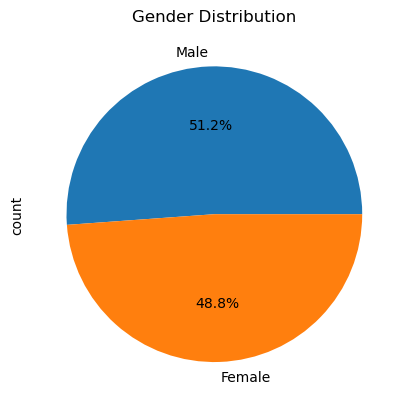

In [130]:
df["Gender"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()

In [131]:
# Average work hours per job role
# Helps identify roles with heavier work schedules
avg_hours_by_role = df.groupby("JobRole")["WorkHoursPerWeek"].mean()
print(avg_hours_by_role)

JobRole
Analyst     49.452785
Engineer    49.971503
HR          49.741688
Manager     49.310263
Sales       49.496164
Name: WorkHoursPerWeek, dtype: float64


In [132]:
# Burnout rate by gender
# Measures how burnout levels vary across genders
burnout_by_gender = df.groupby("Gender")["Burnout"].mean()
print(burnout_by_gender)

Gender
Female    0.062436
Male      0.066471
Name: Burnout, dtype: float64


In [133]:
# Top 3 most stressful job roles
# Identifies roles with the highest average stress level
top_stress_roles = df.groupby("JobRole")["StressLevel"].mean().nlargest(3)
print(top_stress_roles)

JobRole
Sales      5.583120
HR         5.524297
Manager    5.470167
Name: StressLevel, dtype: float64


In [134]:
# Distribution of remote work ratio
# Shows how common different levels of remote work are
remote_ratio_dist = df["RemoteRatio"].value_counts()
print(remote_ratio_dist.head())

RemoteRatio
22    32
42    30
82    28
53    28
45    28
Name: count, dtype: int64


In [135]:
# Average satisfaction by burnout level
# Analyzes how satisfaction changes with burnout
satisfaction_by_burnout = df.groupby("Burnout")["SatisfactionLevel"].mean()
print(satisfaction_by_burnout)

Burnout
0    3.065783
1    1.971938
Name: SatisfactionLevel, dtype: float64


In [136]:
# Average experience by job role
# Determines experience levels across different job roles
exp_by_role = df.groupby("JobRole")["Experience"].mean()
print(exp_by_role)

JobRole
Analyst     10.266344
Engineer     9.898964
HR          10.053708
Manager     10.093079
Sales       10.046036
Name: Experience, dtype: float64


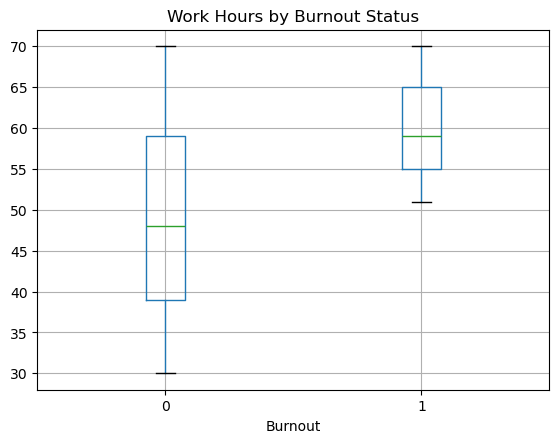

In [137]:
# Visual comparison of work hours between burned out and non-burned out employees
df.boxplot(column="WorkHoursPerWeek", by="Burnout")
plt.title("Work Hours by Burnout Status")
plt.suptitle("")
plt.show()

In [138]:
# Top 10 individuals with highest stress
# Highlights names with highest average stress levels
top_stress_names = df.groupby("Name")["StressLevel"].mean().nlargest(10)
print(top_stress_names)

Name
Dina Ivanov    7.090909
Leo Garcia     6.933333
John Lee       6.888889
Kate Smith     6.666667
Ivan Smith     6.500000
Kate Wang      6.500000
Kate Garcia    6.444444
Dina Brown     6.411765
Max Brown      6.388889
Alex Kim       6.347826
Name: StressLevel, dtype: float64


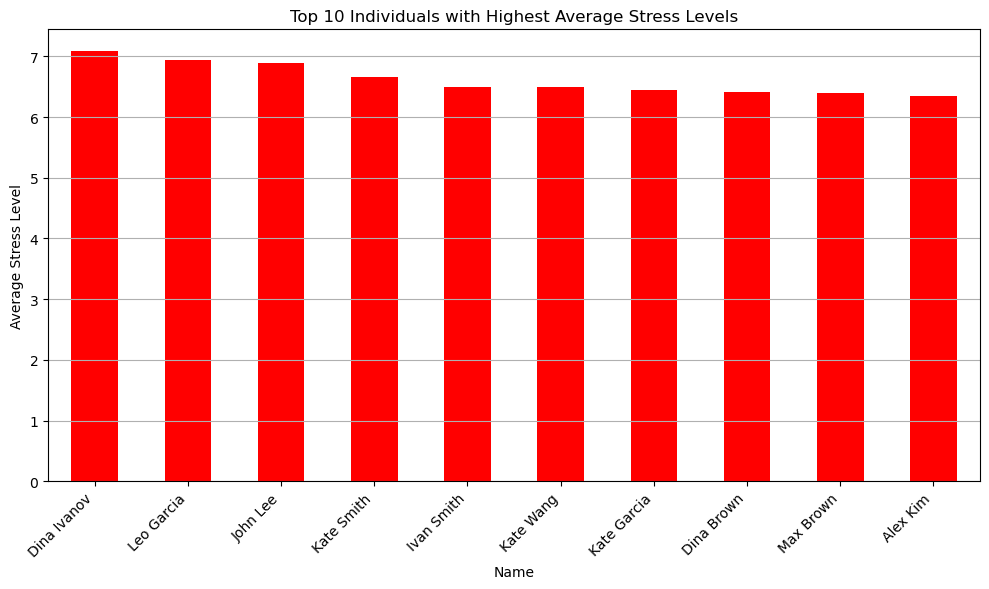

In [139]:
plt.figure(figsize=(10, 6))
top_stress_names.plot(kind="bar", color="red")
plt.title("Top 10 Individuals with Highest Average Stress Levels")
plt.xlabel("Name")
plt.ylabel("Average Stress Level")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [140]:
# Burnout rate by job role
# Shows average burnout rate for each job category
burnout_by_role = df.groupby("JobRole")["Burnout"].mean()
print(burnout_by_role)


JobRole
Analyst     0.048426
Engineer    0.064767
HR          0.066496
Manager     0.066826
Sales       0.076726
Name: Burnout, dtype: float64


In [141]:
# Average age by gender
# Helps identify if age distribution varies by gender
avg_age_by_gender = df.groupby("Gender")["Age"].mean()
print(avg_age_by_gender)


Gender
Female    40.580348
Male      40.803519
Name: Age, dtype: float64


In [142]:
# Satisfaction level by experience
# Shows how employee satisfaction changes with years of experience
satisfaction_by_exp = df.groupby("Experience")["SatisfactionLevel"].mean()
print(satisfaction_by_exp.head())

Experience
0    3.023735
1    3.096416
2    2.892133
3    3.082984
4    3.112479
Name: SatisfactionLevel, dtype: float64


In [143]:
# Number of people per age group
# Breaks down population into age bins to analyze age distribution
age_bins = pd.cut(df["Age"], bins=[20, 30, 40, 50, 60])

age_dist = df.groupby(age_bins, observed=True)["Name"].count()
print(age_dist)


Age
(20, 30]    490
(30, 40]    504
(40, 50]    527
(50, 60]    479
Name: Name, dtype: int64


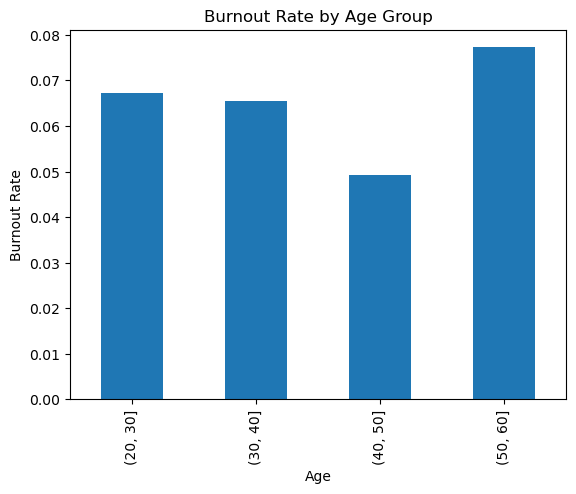

In [144]:
age_bins = pd.cut(df["Age"], bins=[20, 30, 40, 50, 60])

df.groupby(age_bins, observed=True)["Burnout"].mean().plot(kind="bar")
plt.title("Burnout Rate by Age Group")
plt.ylabel("Burnout Rate")
plt.show()

In [145]:
# This shows the average burnout level for each job role, helping identify high-risk positions.
burnout_by_role = df.groupby("JobRole")["Burnout"].mean()
print(burnout_by_role)

JobRole
Analyst     0.048426
Engineer    0.064767
HR          0.066496
Manager     0.066826
Sales       0.076726
Name: Burnout, dtype: float64


In [146]:
# Identifies which roles are most suitable for remote work based on their average remote ratio.
top_remote_roles = df.groupby("JobRole")["RemoteRatio"].mean().nlargest(5)
print(top_remote_roles)

JobRole
Engineer    51.538860
HR          50.744246
Analyst     49.704600
Sales       49.682864
Manager     48.346062
Name: RemoteRatio, dtype: float64


In [147]:
# Compares workload between genders to ensure equitable work distribution.
hours_by_gender = df.groupby("Gender")["WorkHoursPerWeek"].mean()
print(hours_by_gender)

Gender
Female    49.518936
Male      49.653959
Name: WorkHoursPerWeek, dtype: float64


In [148]:
# Top 10 individuals with the highest average satisfaction level
top_satisfaction_names = df.groupby("Name")["SatisfactionLevel"].mean().nlargest(10)
print(top_satisfaction_names)

Name
Alex Brown     3.688125
John Smith     3.632857
Sam Chen       3.492667
Lily Brown     3.473125
Lily Ivanov    3.385909
Kate Garcia    3.374444
Lily Wang      3.357813
Alex Ivanov    3.351579
Max Kim        3.349412
Dina Wang      3.348421
Name: SatisfactionLevel, dtype: float64


In [149]:
burnout_by_stress = df.groupby("StressLevel")["Burnout"].mean()
print(burnout_by_stress)

StressLevel
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.211538
9     0.219626
10    0.215909
Name: Burnout, dtype: float64


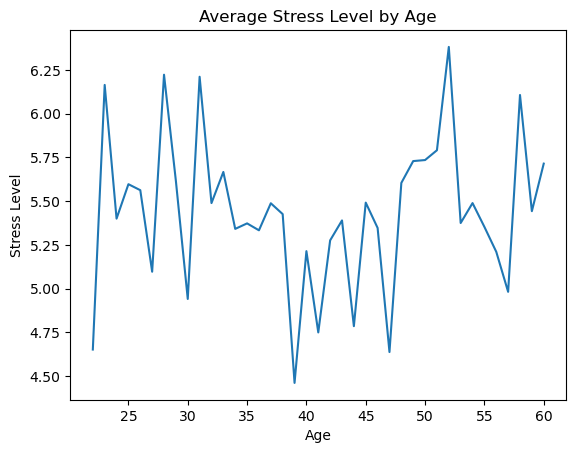

In [150]:
# Visualizes how stress levels vary with age — can indicate support needs for specific age groups.
df.groupby("Age")["StressLevel"].mean().plot(kind="line")
plt.title("Average Stress Level by Age")
plt.ylabel("Stress Level")
plt.show()

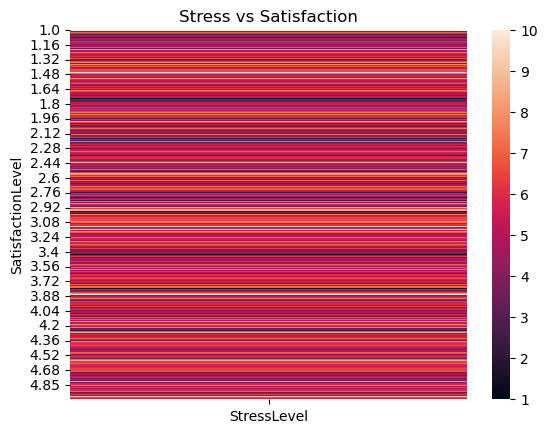

In [151]:
pivot = df.pivot_table(values="StressLevel", index="SatisfactionLevel", aggfunc="mean")
sns.heatmap(pivot)
plt.title("Stress vs Satisfaction")
plt.show()

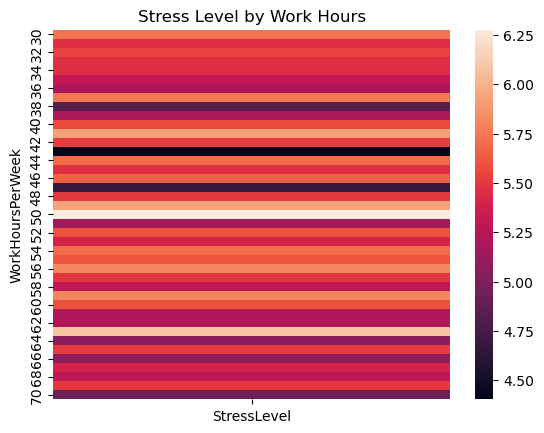

In [152]:
# Create a heatmap to show how stress levels vary with work hours
pivot = df.pivot_table(values="StressLevel", index="WorkHoursPerWeek", aggfunc="mean")
sns.heatmap(pivot)
plt.title("Stress Level by Work Hours")
plt.show()

In [153]:
# Group employees into clusters using KMeans based on their stress and satisfaction levels
X_cluster = df[["StressLevel", "SatisfactionLevel"]]
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_cluster)
df["Cluster"] = kmeans.labels_
print(df.groupby("Cluster")[["StressLevel", "SatisfactionLevel"]].mean())

         StressLevel  SatisfactionLevel
Cluster                                
0           5.483418           2.999388
1           1.966019           2.951764
2           8.946488           3.034699


In [154]:
# Compare burnout rates by experience levels and gender
satisfaction_by_role_gender = df.groupby(["JobRole", "Gender"])["SatisfactionLevel"].mean()
print(satisfaction_by_role_gender)

JobRole   Gender
Analyst   Female    2.862033
          Male      3.023420
Engineer  Female    3.005677
          Male      2.945103
HR        Female    3.023143
          Male      2.975028
Manager   Female    3.042133
          Male      2.995096
Sales     Female    3.018901
          Male      3.038612
Name: SatisfactionLevel, dtype: float64


In [155]:
#Basic Predictive Modeling for Burnout (Logistic Regression)
# Predict burnout using logistic regression based on key features

X = df[["Age", "WorkHoursPerWeek", "RemoteRatio", "SatisfactionLevel", "StressLevel"]]
y = df["Burnout"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression().fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.95


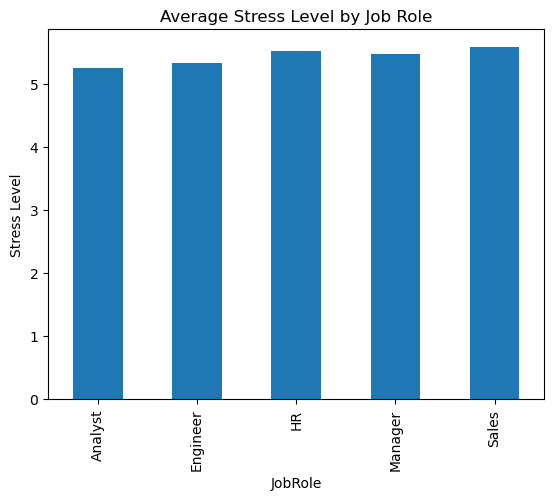

In [156]:
df.groupby("JobRole")["StressLevel"].mean().plot(kind="bar")
plt.title("Average Stress Level by Job Role")
plt.ylabel("Stress Level")
plt.show()